# Lab2 - Thresholding

## Task 1: Download Images and Readthem into Workspace



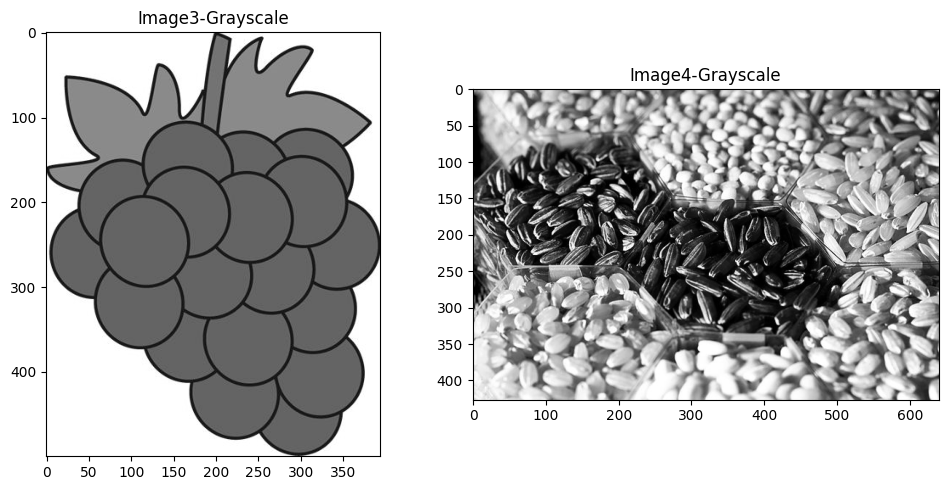

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

# Read the image in RGB format
image3 = cv2.imread('img3.png')
image4 = cv2.imread('img4.png')

# Convert the image to grayscale
gray_image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
gray_image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(gray_image3, cmap='gray')
plt.title('Image3-Grayscale')


plt.subplot(122)
plt.imshow(gray_image4, cmap='gray')
plt.title('Image4-Grayscale')

plt.tight_layout()
plt.show()


## Task 2: Implement Otsu's Method equations 1 and 2 as a function to calculate the threshold value for any given image.

### Otsu's Method:

This method assumes that the image contain’s two classes (object and  background) and determines most suited intensity to separate the two classes. Otsu shows that the most suited threshold will maximize the inter-class variance. Therefore we need to find the intensity level that maximizes the inter-class variance.

In order to calculate inter-class variance we define the
class probability and class mean as follows (Equation 1):



* Equation 1:

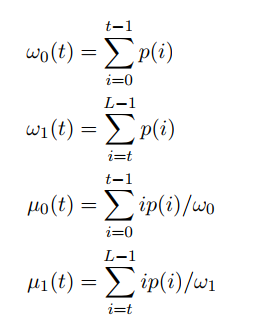

* Equation 2:

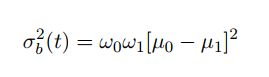


In [6]:
import numpy as np
import cv2

def find_otsu_threshold(image):
    # Calculate histogram
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_norm = hist.ravel() / hist.max()

    # Calculate class probabilities and class means
    total_pixels = image.shape[0] * image.shape[1]
    class_probs = np.cumsum(hist_norm)
    class_means = np.cumsum(hist_norm * np.arange(256))
    global_mean = class_means[-1]

    # Initialize variables
    best_threshold = 0
    max_variance = 0

    for threshold in range(256):
        # Calculate class variances
        w0 = class_probs[threshold]
        w1 = 1 - w0
        if w0 == 0 or w1 == 0:
            continue  # Skip if one of the classes has no pixels

        u0 = class_means[threshold] / w0
        u1 = (global_mean - class_means[threshold]) / w1

        # Calculate inter-class variance
        variance = w0 * w1 * (u0 - u1) ** 2

        # Update maximum variance and threshold
        if variance > max_variance:
            max_variance = variance
            best_threshold = threshold

    return best_threshold

## Task 3: Calculate and report the threshold values for im3.png and im4.png found using the Implemented Otsu's Method.



In [7]:
# Find the Otsu's Theshold For img3 and img4
threshIm3 = find_otsu_threshold(gray_image3)
threshIm4 = find_otsu_threshold(gray_image4)

# Print the Threshold Values
print("Otsu's Best Threshold Value for Image3:", threshIm3)
print("Otsu's Best Threshold Value for Image4:", threshIm4)


Otsu's Best Threshold Value for Image3: 103
Otsu's Best Threshold Value for Image4: 0


## Task 4: Develop code to convert a grayscale image to a binary image using a given threshold value.

In [8]:
import cv2
import numpy as np

def gray_to_binary_thresh(image, threshold):
    # Create an empty binary image of the same size as the input image
    binary_image = np.zeros_like(image)

    # Iterate over each pixel of the input image
    rows, cols = image.shape
    for row in range(rows):
        for col in range(cols):
            # If the pixel intensity is above the threshold, set it to 255 (white) in the binary image
            if image[row, col] > threshold:
                binary_image[row, col] = 255

    return binary_image




## Task5: Use the threshold values found in question 3 and generate binary image for img3.png and img4.png

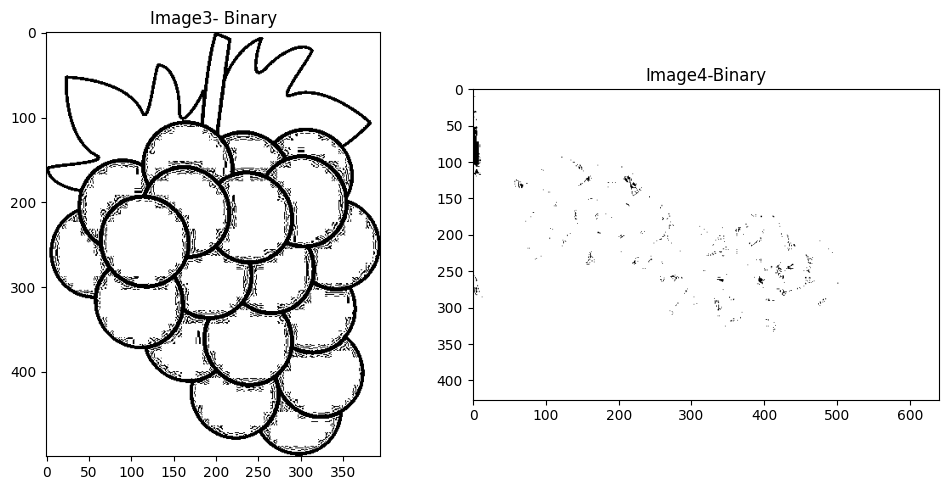

In [9]:
# Create the Binary Images Using the Otsu's Threshold Values Found
binary_img3 = gray_to_binary_thresh(gray_image3, threshIm3)
binary_img4 = gray_to_binary_thresh(gray_image4, threshIm4)

# Display the Thresholded Images
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(binary_img3, cmap='gray')
plt.title('Image3- Binary')


plt.subplot(122)
plt.imshow(binary_img4, cmap='gray')
plt.title('Image4-Binary')

plt.tight_layout()
plt.show()